In [40]:
import pandas as pd

In [41]:
alive_pred_bequestors = pd.read_csv('alive_pred_bequestors_07012024.csv')

In [42]:
bequests_cleaned = pd.read_csv('bequests_cleaned.csv')

In [56]:
# show number of "alive" bequestors in the database
# these are people who have given bequests but were mistakenly not marked as deceased
bequests_cleaned[bequests_cleaned['DEATH_FLAG'] == 0]['BEQUEST_RECEIVED'].sum()

34

In [44]:
# Drop LE column from bequests_cleaned
bequests_cleaned = bequests_cleaned.drop(columns=['LE'])

In [45]:
all_bequestors = pd.read_csv('combined_bequest_20240610.csv', low_memory=False)

In [46]:
all_bequestors.columns

Index(['ROI_ID', 'ROI_FAMILY_ID', 'QUARTILE', 'HOH_BIRTH_DATE', 'STREET',
       'CITY', 'STATE', 'ZIPCODE', 'ADDRESS_TYPE', 'PRIMARY_ADDRESS',
       'ADDRESS_CONTACT_STATUS', 'REGION_CODE', 'TOTAL_TRANSACTIONS',
       'TOTAL_AMOUNT', 'FIRST_GIFT_AMOUNT', 'FIRST_GIFT_DATE', 'MRC_DATE',
       'MRC_AMOUNT', 'HPC_DATE', 'HPC_AMOUNT',
       'IWAVE_EXTERNAL_GIVING_VELOCITY', 'IWAVE_GIVING_CAPACITY_5YR',
       'IWAVE_GIVING_CAPACITY_SOURCE', 'IWAVE_PLANNED_GIVING',
       'IWAVE_PROSPECT_CLASSIFICATION', 'IWAVE_SUGGESTED_CULTIVATION',
       'IWAVE_SUGGESTED_ENGAGEMENT_LEAD', 'FIRST_BEQUEST_DATE',
       'LAST_BEQUEST_DATE', 'FIRST_BEQUEST_FISCAL_YEAR',
       'LAST_BEQUEST_FISCAL_YEAR', 'FIRST_BEQUEST_NET_AMOUNT',
       'LAST_BEQUEST_NET_AMOUNT'],
      dtype='object')

In [47]:
# Filter bequests_cleaned to only include the predicted living bequestors
alive_pred_bequestors_desc = bequests_cleaned[bequests_cleaned['ROI_ID'].isin(alive_pred_bequestors['ROI_ID'])]

In [48]:
# Find proportion of missing values in each column
missing_prop = alive_pred_bequestors_desc.isnull().mean()
missing_prop

ROI_ID                    0.000000
ROI_FAMILY_ID             0.000000
STATE                     0.000000
REGION_CODE               0.000000
TOTAL_TRANSACTIONS        0.000000
TOTAL_AMOUNT              0.000000
FIRST_GIFT_AMOUNT         0.000000
MRC_AMOUNT                0.000000
HPC_AMOUNT                0.000000
DEATH_FLAG                0.000000
YEARS_SINCE_FIRST_GIFT    0.000000
YEARS_SINCE_MRC_GIFT      0.000000
YEARS_SINCE_HPC_GIFT      0.000000
BEQUEST_RECEIVED          0.000000
BIRTH_YEAR                0.132364
dtype: float64

In [ ]:
alive_pred_bequestors_desc.loc[:, 'BIRTH_YEAR'] = pd.to_numeric(alive_pred_bequestors_desc['BIRTH_YEAR'], errors='coerce')
alive_pred_bequestors_desc.loc[:, 'APPROX_AGE'] = 2024 - alive_pred_bequestors_desc['BIRTH_YEAR']

In [50]:
alive_pred_bequestors_desc.head()

,ROI_ID,ROI_FAMILY_ID,STATE,REGION_CODE,TOTAL_TRANSACTIONS,TOTAL_AMOUNT,FIRST_GIFT_AMOUNT,MRC_AMOUNT,HPC_AMOUNT,DEATH_FLAG,YEARS_SINCE_FIRST_GIFT,YEARS_SINCE_MRC_GIFT,YEARS_SINCE_HPC_GIFT,BEQUEST_RECEIVED,BIRTH_YEAR,APPROX_AGE
809,33940453,33940453,NY,NERO,9.0,40025.0,25.0,5000.0,5000.0,0,22,0,0,0,1973.0,51.0
10202,35007139,35007139,CA,PARO,21.0,10450.0,50.0,5000.0,5000.0,0,22,6,6,0,1938.0,86.0
16530,35016646,35016646,GA,SERO,19.0,77600.0,50.0,10000.0,10000.0,0,22,0,0,0,1930.0,94.0
17357,35018073,35018073,NM,SWRO,10.0,4060.0,25.0,2000.0,2000.0,0,22,7,7,0,1963.0,61.0
18867,35020427,35020427,CO,SWRO,24.0,219650.0,10000.0,100.0,50000.0,0,19,0,11,0,1952.0,72.0


In [51]:
# Count number of alive_pred_bequestors_desc have BEQUEST_RECEIVED = 1
alive_pred_bequestors_desc[alive_pred_bequestors_desc['BEQUEST_RECEIVED'] == 1].shape

(31, 16)

In [ ]:
# list ROI_IDs of alive_pred_bequestors_desc who have BEQUEST_RECEIVED = 1
living_dead = alive_pred_bequestors_desc[alive_pred_bequestors_desc['BEQUEST_RECEIVED'] == 1]['ROI_ID']
#living_dead

In the full dataset there were only 34 records where the person is alive and BEQUEST_DATE is not null    
(i.e. they have given a bequest but they're not marked as dead).    
This means that the model only missed 3 people (recall = .91176471)

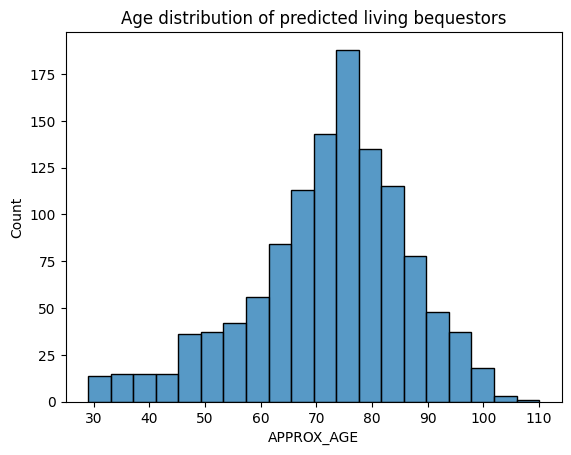

In [53]:
# plot age distribution of alive_pred_bequestors_desc
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(alive_pred_bequestors_desc['APPROX_AGE'], bins=20)
plt.title('Age distribution of predicted living bequestors')
plt.show()

In [54]:
# Filter alive_pred_bequestors_desc to only include people with approx age < 85
alive_pred_bequestors_desc = alive_pred_bequestors_desc[alive_pred_bequestors_desc['APPROX_AGE'] < 85]
alive_pred_bequestors_desc.shape

(985, 16)

In [55]:
# Write alive_pred_bequestors_desc to csv
alive_pred_bequestors_desc.to_csv('alive_pred_bequestors_desc_07012024.csv', index=False)